### Application of $\chi^2$ on ASCAD

On a per-sample-point basis.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from tools.nbloader import NotebookLoader

from tools.traceloader import ASCAD, TraceGroup

sns.set_style("whitegrid")

In [2]:
KEY_SIZE = 256
TRACE_LEN = 1400

ascad = ASCAD()
ascad.default.profile.traces.shape

(200000, 1400)

In [3]:
chi2 = NotebookLoader(["../tvla"]).load_module('chi2')

importing Jupyter notebook from ../tvla/chi2.ipynb


### chi-squared sliding window

In [4]:
SLIDING_WINDOW_SIZE = 1

def sliding_window(tg: TraceGroup, key_l=1, key_r=1, progress=True):
    trace_l = tg.profile.filter_traces(key_l)
    trace_r = tg.attack.filter_traces(key_r)

    trace_size = ASCAD.trace_len
    acc = np.zeros(trace_size - SLIDING_WINDOW_SIZE)

    window_ixs = range(0, trace_size - SLIDING_WINDOW_SIZE)
    if progress:
        window_ixs = tqdm(window_ixs)

    for ix in window_ixs:
        poi = (ix, ix + SLIDING_WINDOW_SIZE)
        p_value = 1 - chi2.chi_squared(chi2.count(trace_l, poi), chi2.count(trace_r, poi))
        acc[ix] = p_value

    return acc

SW_EQ = sliding_window(ascad.default)

100%|██████████| 1399/1399 [00:04<00:00, 285.91it/s]


In [5]:
SW_NEQ = sliding_window(ascad.default, 1, 2)

100%|██████████| 1399/1399 [00:04<00:00, 294.37it/s]


### Experiments with sliding window on $\chi^2$

With a sliding window over only 1, a

In [6]:
poi = NotebookLoader(["../data"]).load_module("poi")

importing Jupyter notebook from ../data/poi.ipynb


Small $p$ values give evidence to reject the null hypothesis and conclude that the observations are not independent.

<AxesSubplot:label='96e3f067-86d0-4e50-803c-7826157f09ca', ylabel='$p$-values sliding window equal key'>

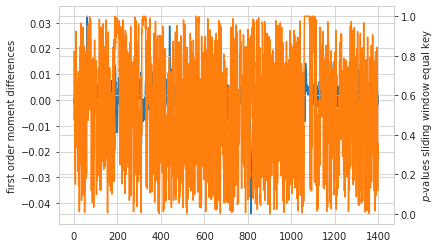

In [7]:
ax = sns.lineplot(data=pd.DataFrame(poi.MOMENT_DIFFERENCES[1]), legend=None)
ax.set(ylabel = 'first order moment differences')
ax2 = plt.twinx()
ax2.set(ylabel = '$p$-values sliding window equal key')
sns.lineplot(data=pd.DataFrame([*([np.nan] * round(SLIDING_WINDOW_SIZE / 2)), *SW_EQ]), palette=[sns.color_palette()[1]], legend=None)

<AxesSubplot:label='dae396f5-54cb-4856-bdd4-d96a993fb4c1', ylabel='$p$-values sliding window different key'>

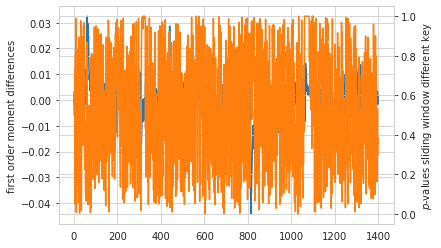

In [8]:
ax = sns.lineplot(data=pd.DataFrame(poi.MOMENT_DIFFERENCES[1]), legend=None)
ax.set(ylabel = 'first order moment differences')
ax2 = plt.twinx()
ax2.set(ylabel = '$p$-values sliding window different key')
sns.lineplot(data=pd.DataFrame([*([np.nan] * round(SLIDING_WINDOW_SIZE / 2)), *SW_NEQ]), palette=[sns.color_palette()[1]], legend=None)

In [9]:
SW_DIFF = SW_EQ - SW_NEQ
SW_DIFF_CUTOFF = SW_DIFF * (SW_DIFF > 0)

<AxesSubplot:label='85685f6e-d4ca-4d79-bd80-dc42e36940b4', ylabel='$p$-value difference'>

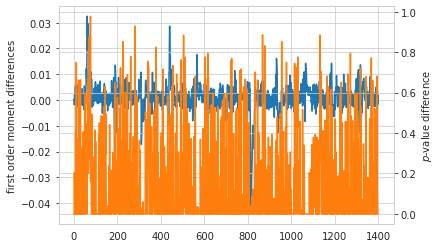

In [10]:
ax = sns.lineplot(data=pd.DataFrame(poi.MOMENT_DIFFERENCES[1]), legend=None)
ax.set(ylabel = 'first order moment differences')
ax2 = plt.twinx()
ax2.set(ylabel = '$p$-value difference')
sns.lineplot(data=pd.DataFrame([*([np.nan] * round(SLIDING_WINDOW_SIZE / 2)), *SW_DIFF_CUTOFF]), palette=[sns.color_palette()[1]], legend=None)